In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import sys
import os
from scipy.stats import linregress
import statsmodels.api as sm

In [3]:
# The path to our CSV file
file = 'data_files/data.csv'

In [4]:
# Read our combined data into pandas
data = pd.read_csv(file)
data.head()

,Year,Month,Natural Cause,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Influenza and Pneumonia,Chronic Lower Respiratory Diseases,Other Diseases of Respiratory System,"Nephritis, Nephrotic Syndrome, and Nephrosis","Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",Diseases of Heart,Cerebrovascular Diseases,"Nephritis, Nephrotic Syndrome and Nephrosis","Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death)
0,2014,1,226621,3944,51101,7344,8305,7929,15078,3466,4600.0,2815.0,58229,12074,NaN,NaN,NaN,NaN
1,2014,2,197001,3214,45558,6443,7315,5561,12747,2873,4064.0,2532.0,50435,10780,NaN,NaN,NaN,NaN
2,2014,3,212045,3451,50646,6738,7999,5148,13493,3260,4300.0,2632.0,54347,11395,NaN,NaN,NaN,NaN
3,2014,4,199454,3125,48304,6343,7117,4512,12573,3179,3902.0,2549.0,50954,10773,NaN,NaN,NaN,NaN
4,2014,5,199843,3105,49497,6272,7266,4099,12281,3101,3980.0,2584.0,50810,10963,NaN,NaN,NaN,NaN


In [5]:
#Replace "NaN" with 0
data = data.fillna(0)

data.head()

,Year,Month,Natural Cause,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Influenza and Pneumonia,Chronic Lower Respiratory Diseases,Other Diseases of Respiratory System,"Nephritis, Nephrotic Syndrome, and Nephrosis","Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",Diseases of Heart,Cerebrovascular Diseases,"Nephritis, Nephrotic Syndrome and Nephrosis","Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death)
0,2014,1,226621,3944,51101,7344,8305,7929,15078,3466,4600.0,2815.0,58229,12074,0.0,0.0,0.0,0.0
1,2014,2,197001,3214,45558,6443,7315,5561,12747,2873,4064.0,2532.0,50435,10780,0.0,0.0,0.0,0.0
2,2014,3,212045,3451,50646,6738,7999,5148,13493,3260,4300.0,2632.0,54347,11395,0.0,0.0,0.0,0.0
3,2014,4,199454,3125,48304,6343,7117,4512,12573,3179,3902.0,2549.0,50954,10773,0.0,0.0,0.0,0.0
4,2014,5,199843,3105,49497,6272,7266,4099,12281,3101,3980.0,2584.0,50810,10963,0.0,0.0,0.0,0.0


In [6]:
# # Summing deaths for each year
# deaths_per_year = data.groupby('Year')['Septicemia', 'Malignant Neoplasms', 'Diabetes Mellitus', 'Alzheimer Disease', 'Influenza and Pneumonia', 'Chronic Lower Respiratory Diseases', 'Other Diseases of Respiratory System', 'Nephritis, Nephrotic Syndrome and Nephrosis', 'Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified', 'Diseases of Heart', 'Cerebrovascular Diseases', 'Nephritis, Nephrotic Syndrome and Nephrosis', 'Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified', 'COVID-19 (Multiple Cause of Death)', 'COVID-19 (Underlying Cause of Death)'].sum()

# # Year with maximum deaths
# max_death_year = deaths_per_year.idxmax()
# max_death_count = deaths_per_year.max()

# print(f"The year with the most deaths was {max_death_year} with {max_death_count} deaths.")

## 1. Descriptive Analysis

In [7]:
## Calculate the total number of deaths for each illness per year 
yearly_counts = data.groupby('Year').sum().drop(columns=['Month'])
yearly_counts.head(10)

,Natural Cause,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Influenza and Pneumonia,Chronic Lower Respiratory Diseases,Other Diseases of Respiratory System,"Nephritis, Nephrotic Syndrome, and Nephrosis","Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",Diseases of Heart,Cerebrovascular Diseases,"Nephritis, Nephrotic Syndrome and Nephrosis","Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death)
Year,,,,,,,,,,,,,,,,
2014,2424126,38940,591700,76488,93541,55227,147101,36187,48146.0,32242.0,614348,133103,0.0,0.0,0.0,0.0
2015,2495936,40773,595930,79535,110561,57062,155041,38286,49959.0,32042.0,633842,140323,0.0,0.0,0.0,0.0
2016,2509054,40613,598038,80058,116103,51537,154596,39224,50046.0,33373.0,635260,142142,0.0,0.0,0.0,0.0
2017,2566005,40922,599108,83564,121404,55672,160201,41693,50633.0,32750.0,647457,146383,0.0,0.0,0.0,0.0
2018,2594018,40718,599274,84946,122019,59120,159486,43814,51386.0,32537.0,655381,147810,0.0,0.0,0.0,0.0
2019,2603461,38431,599601,87647,121499,49783,156979,44112,51565.0,32408.0,659041,150005,0.0,0.0,0.0,0.0
2020,3103810,40114,603112,102308,134271,53635,152763,45160,0.0,0.0,698359,160516,52598.0,33041.0,385676.0,351829.0
2021,3157420,41341,606030,103419,119442,42012,142450,45954,0.0,0.0,696773,163115,54432.0,34998.0,463267.0,417869.0
2022,2974415,42349,609265,101390,120156,47163,147549,48143,0.0,0.0,704786,165726,58017.0,34679.0,246166.0,186981.0


In [8]:
## Calculate the total number of deaths for each illness per month
monthly_counts = data.groupby(['Year', 'Month']).sum()
monthly_counts.head()

Natural Cause  Septicemia  Malignant Neoplasms  Diabetes Mellitus  \
Year Month                                                                      
2014 1             226621        3944                51101               7344   
     2             197001        3214                45558               6443   
     3             212045        3451                50646               6738   
     4             199454        3125                48304               6343   
     5             199843        3105                49497               6272   

            Alzheimer Disease  Influenza and Pneumonia  \
Year Month                                               
2014 1                   8305                     7929   
     2                   7315                     5561   
     3                   7999                     5148   
     4                   7117                     4512   
     5                   7266                     4099   

            Chronic Lower Respiratory Diseases  \
Year Month                                       
2014 1                                   15078   
     2                                   12747   
     3                                   13493   
     4                                   12573   
     5                                   12281   

            Other Diseases of Respiratory System  \
Year Month                                         
2014 1                                      3466   
     2                                      2873   
     3                                      3260   
     4                                      3179   
     5                                      3101   

            Nephritis, Nephrotic Syndrome, and Nephrosis  \
Year Month                                                 
2014 1                                            4600.0   
     2                                            4064.0   
     3                                            4300.0   
     4                                            3902.0   
     5                                            3980.0   

            Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified  \
Year Month                                                                                             
2014 1                                                 2815.0                                          
     2                                                 2532.0                                          
     3                                                 2632.0                                          
     4                                                 2549.0                                          
     5                                                 2584.0                                          

            Diseases of Heart  Cerebrovascular Diseases  \
Year Month                                                
2014 1                  58229                     12074   
     2                  50435                     10780   
     3                  54347                     11395   
     4                  50954                     10773   
     5                  50810                     10963   

            Nephritis, Nephrotic Syndrome and Nephrosis  \
Year Month                                                
2014 1                                              0.0   
     2                                              0.0   
     3                                              0.0   
     4                                              0.0   
     5                                              0.0   

            Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified  \
Year Month                                                                                            
2014 1                                                    0.0                                         
     2                            

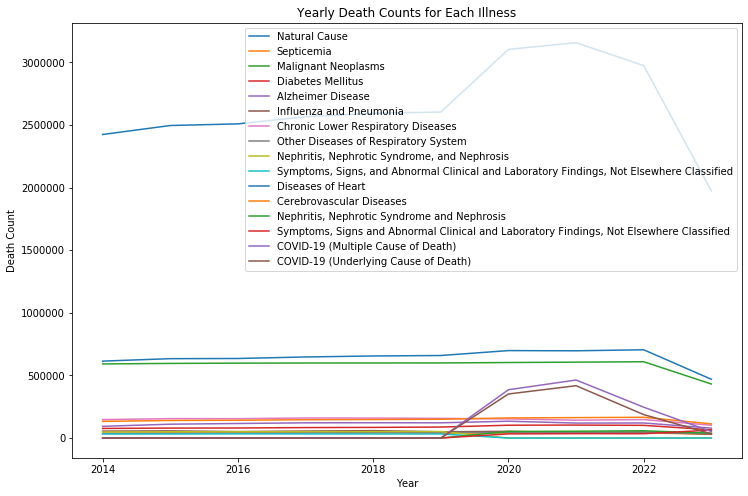

In [9]:
# Plot yearly counts for all illnesses
yearly_counts.plot(figsize=(12, 8))
plt.title("Yearly Death Counts for Each Illness")
plt.ylabel("Death Count")
plt.show()

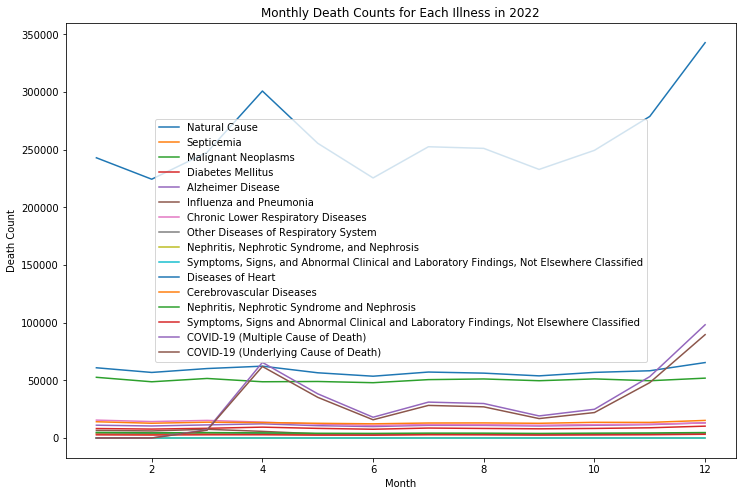

In [10]:
# Plot monthly counts for all illnesses for a specific year
monthly_counts.loc[2020].plot(figsize=(12, 8))
plt.title("Monthly Death Counts for Each Illness in 2022")
plt.ylabel("Death Count")
plt.show()

## 2. Seasonality

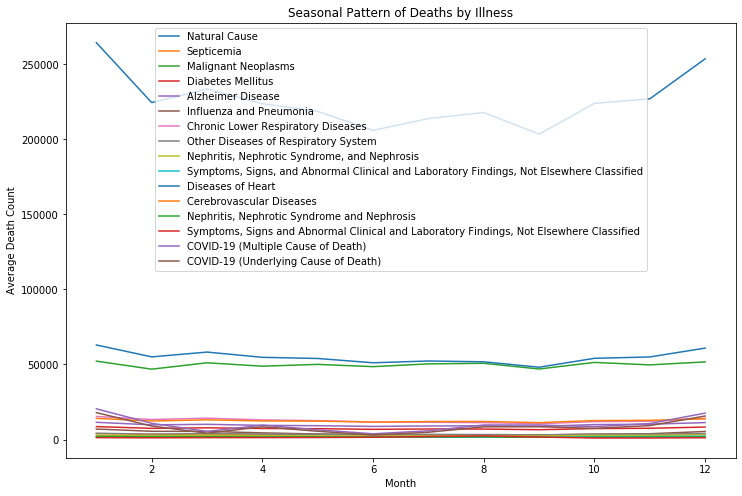

In [32]:
## Plot deaths for each illness by month across years to look for patterns
for illness in yearly_counts.columns:
    data.groupby('Month')[illness].mean().plot(label=illness, figsize=(12, 8), legend=True)
plt.title("Seasonal Pattern of Deaths by Illness")
plt.ylabel("Average Death Count")
plt.show()

In [84]:
# # 3. Yearly Trends
# ## Plot the yearly death counts for each illness
# yearly_counts.plot(subplots=True, layout=(-1, 2), figsize=(14, 18))
# plt.tight_layout()
# plt.show()

##  4. Correlation with Seasons/Holidays

In [36]:
## For simplicity, let's check correlation of each illness with month (as a proxy for season)
#correlations = data.corr()['Month'].drop('Month')
#print(correlations)

In [12]:
# Calculate the standard deviation for each illness
# std_devs = data.loc[:, 'Septicemia':'Cerebrovascular Diseases'].std()
# print(std_devs)

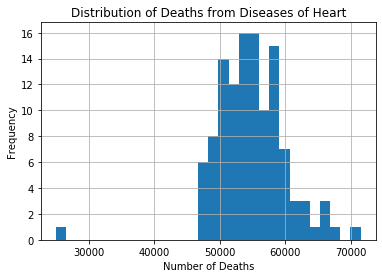

In [38]:
# Plot histogram for a specific illness, say 'Diseases of Heart'
data['Diseases of Heart'].hist(bins=30) # Adjust bins as needed
plt.title('Distribution of Deaths from Diseases of Heart')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.show()

In [13]:
# This will plot histograms for each illness
# for column in data.columns[5:20]: # Adjust indices according to the columns of interest
    #data[column].hist(bins=30)
    #plt.title(f'Distribution of Deaths from {column}')
    #plt.xlabel('Number of Deaths')
#     plt.ylabel('Frequency')
#     plt.show()

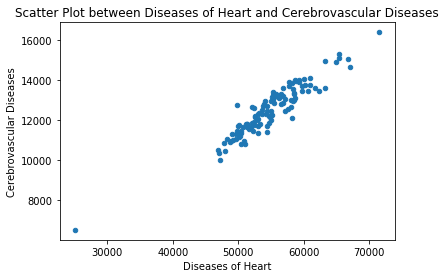

In [22]:
# Scatter plot between 'Diseases of Heart' and 'Diabetes Mellitus'
data.plot.scatter(x='Diseases of Heart', y='Cerebrovascular Diseases')
plt.title('Scatter Plot between Diseases of Heart and Cerebrovascular Diseases')
plt.show()


In [15]:
# illness_columns = data.columns[5:16] # Adjust indices as per your dataset

# # Nested loop to plot scatter plots between all pairs of illnesses
# for i in range(len(illness_columns)):
#     for j in range(i+1, len(illness_columns)):
#         data.plot.scatter(x=illness_columns[i], y=illness_columns[j])
#         plt.title(f'Scatter Plot between {illness_columns[i]} and {illness_columns[j]}')
#         plt.show()


In [16]:
# # Linear regression between 'Diseases of Heart' and 'Diabetes Mellitus'
# slope, intercept, r_value, p_value, std_err = linregress(data['Diseases of Heart'], data['Diabetes Mellitus'])

# print(f"Slope: {slope}")
# print(f"Intercept: {intercept}")
# print(f"R-squared: {r_value**2}")

In [17]:
# import statsmodels.api as sm

# # Assuming 'Month' is coded as 1 for January, 2 for February, etc.
# X = data['Month']
# y = data['Diseases of Heart']

# # Add a constant term for the intercept
# X = sm.add_constant(X)

# # Fit the model
# model = sm.OLS(y, X).fit()

# # Summary of regression, including the line equation, R-squared value, etc.
# print(model.summary())

In [18]:
# # Set up the regression model
# X = data['Month']
# y = data['Diseases of Heart']
# X = sm.add_constant(X)
# model = sm.OLS(y, X).fit()

# # Get the regression line equation: y = mx + b
# m, b = model.params[1], model.params[0]

# # Generate y-values for the regression line
# regression_line = m * data['Month'] + b

# # Plotting
# plt.scatter(data['Month'], data['Diseases of Heart'], alpha=0.5)
# plt.plot(data['Month'], regression_line, color='red', label=f'Regression Line: y = {m:.2f}x + {b:.2f}')
# plt.title('Linear Regression of Diseases of Heart on Month')
# plt.xlabel('Month')
# plt.ylabel('Diseases of Heart')
# plt.legend()
# plt.show()

In [1]:
plt.scatter(data['Diseases of Heart'], data['Cerebrovascular Diseases'], label='Data points')
plt.plot(data['Diseases of Heart'], slope*data['Diseases of Heart'] + intercept, color='red', label='Linear Regression Line')
plt.title('Scatter Plot with Linear Regression Line')
plt.xlabel('Diseases of Heart')
plt.ylabel('Cerebrovascular Diseases')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

## 5. COVID-19 Influence

In [ ]:
# fig1 = plt.figure(figsize = (12,4))
# fig1.suptitle("Standardized Monthly Deviation for Each Year", fontsize=14)

# fig1_ax1 = fig1.add_subplot(1,2,1)
# fig1_ax2 = fig1.add_subplot(1,2,2)
# pre_covid_df = standard_spread.loc[:'2019']
# x_values = pre_covid_df
# y_values = standard_spread["Diseases of Heart"]

# fig1b = plt.figure()
# fig1b.suptitle("Standardized Monthly Deviation for Diseases of Heart", fontsize=14)
# ax = fig1b.add_subplot()
# ax.scatter(x_values, y_values, c="red")


# x_values = standard_spread.index.loc[:'2019']
# y_values = standard_spread["Cerebrovascular Diseases"]

# fig1b = plt.figure()
# fig1b.suptitle("Standardized Monthly Deviation for Cerebrovascular Diseases", fontsize=14)
# ax = fig1b.add_subplot()
# ax.scatter(x_values, y_values, c="blue")

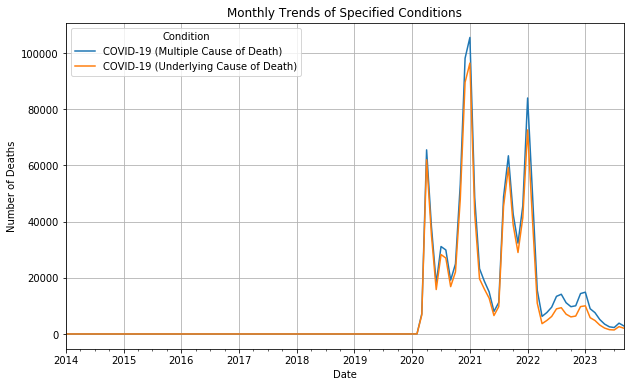

In [82]:
# Convert 'Year' and 'Month' to datetime format to make plotting easier
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str))

# Set Date as the index
data.set_index('Date', inplace=True)

# Summing the specified columns
columns_of_interest = [
#     'Diseases of Heart',
#     'Malignant Neoplasms',
#     'Cerebrovascular Diseases',
    'COVID-19 (Multiple Cause of Death)',
    'COVID-19 (Underlying Cause of Death)'
]
monthly_sum = data[columns_of_interest].resample('M').sum()  # Monthly aggregation

# Plotting
monthly_sum.plot(figsize=(10, 6))
plt.title('Monthly Trends of Specified Conditions')
plt.ylabel('Number of Deaths')
plt.xlabel('Date')
plt.legend(title='Condition')
plt.grid(True)
plt.show()

###  1. Data Segmentation:

In [56]:
# Assuming the date when COVID-19 deaths first appeared as the start
start_of_covid = data[data['COVID-19 (Multiple Cause of Death)'] > 0].index.min()

pre_covid_data = data[data.index < start_of_covid]
#print(pre_covid_data)
post_covid_data = data[data.index >= start_of_covid]

### 2. Trend Analysis:

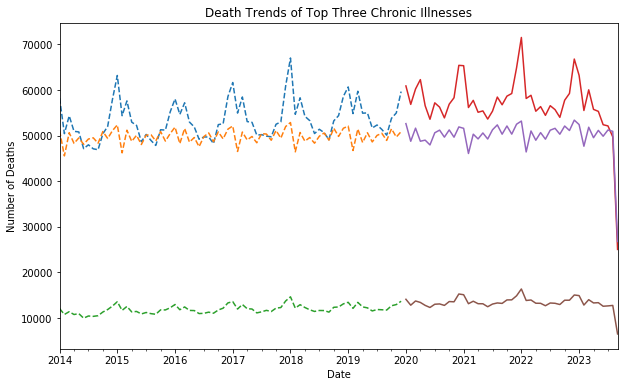

In [60]:
import matplotlib.pyplot as plt

illnesses = ['Diseases of Heart', 'Malignant Neoplasms', 'Cerebrovascular Diseases']

# Plot pre-COVID data
for illness in illnesses:
    pre_covid_data[illness].plot(label=f'Pre-COVID {illness}', linestyle='--', figsize=(10, 6))

# Plot post-COVID data
for illness in illnesses:
    post_covid_data[illness].plot(label=f'Post-COVID {illness}')

plt.title('Death Trends of Top Three Chronic Illnesses')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend(title='contition')
plt.show()

In [80]:
# from scipy.stats import ttest_ind

# for illness in illnesses:
#     t_stat, p_value = ttest_ind(pre_covid_data[illness], post_covid_data[illness])
#     print(f"For {illness}: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")


### 4. Forecasting:

/Users/dameducharme/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/dameducharme/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/dameducharme/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


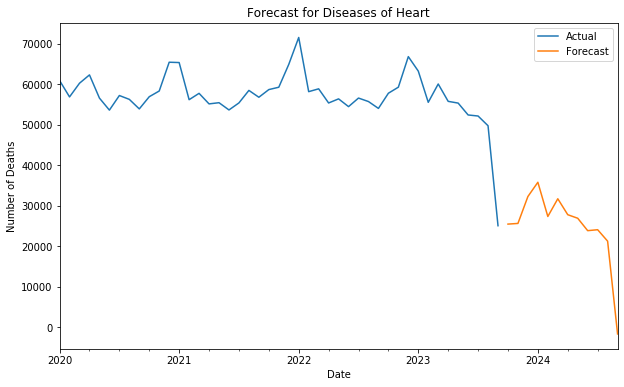

/Users/dameducharme/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/dameducharme/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/dameducharme/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dameducharme/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


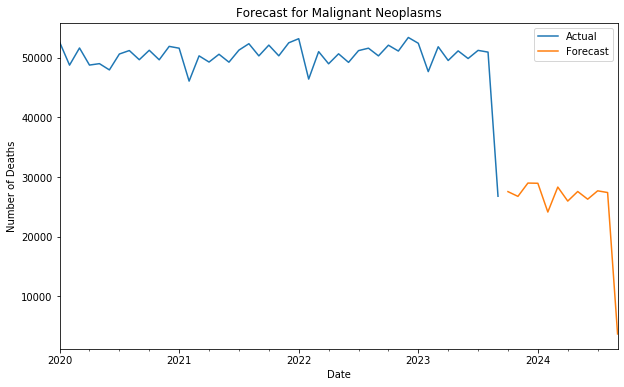

/Users/dameducharme/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/dameducharme/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/dameducharme/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/Users/dameducharme/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


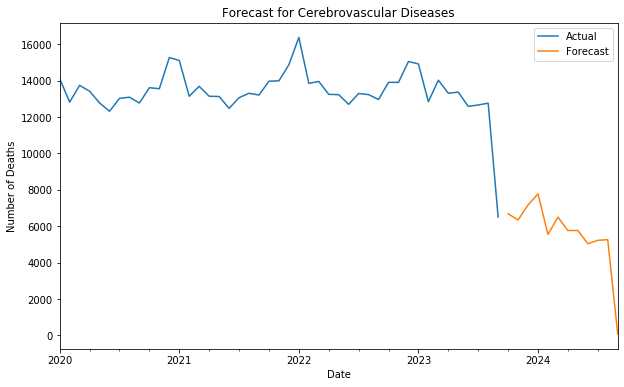

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

for illness in illnesses:
    ts_data = post_covid_data[illness]
    sarima_model = SARIMAX(ts_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_result = sarima_model.fit()

    # Forecast next 12 months
    sarima_forecast = sarima_result.forecast(steps=12)
    
    plt.figure(figsize=(10, 6))
    ts_data.plot(label='Actual')
    sarima_forecast.plot(label='Forecast')
    plt.title(f'Forecast for {illness}')
    plt.xlabel('Date')
    plt.ylabel('Number of Deaths')
    plt.legend()
    plt.show()

### Heatmap of Correlations:

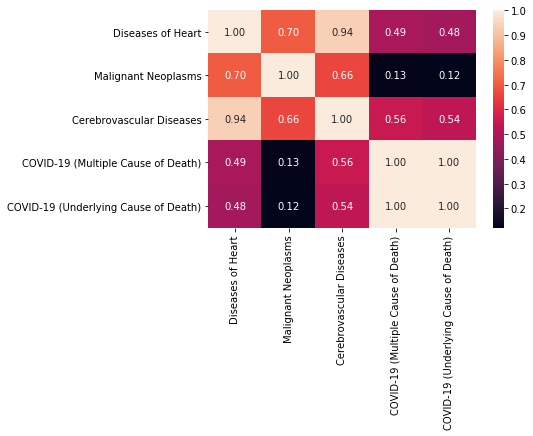

In [48]:
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

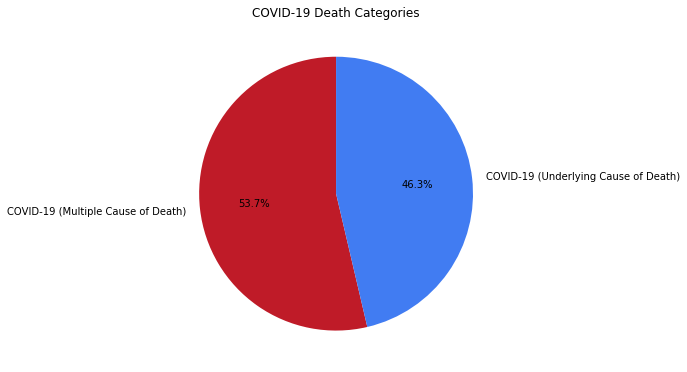

In [83]:
# Creating a pie chart to visualize the comparison between "COVID-19 (Multiple Cause of Death)" and "COVID-19 (Underlying Cause of Death)"

# Sum the data for the columns of interest
covid_deaths = data[['COVID-19 (Multiple Cause of Death)', 'COVID-19 (Underlying Cause of Death)']].sum()

# Create the pie chart
plt.figure(figsize=(8, 6))
covid_deaths.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#BF1B28','#417CF2'])
plt.title('COVID-19 Death Categories')
plt.ylabel('')  # This is to remove the default column name as ylabel
plt.tight_layout()
plt.show()


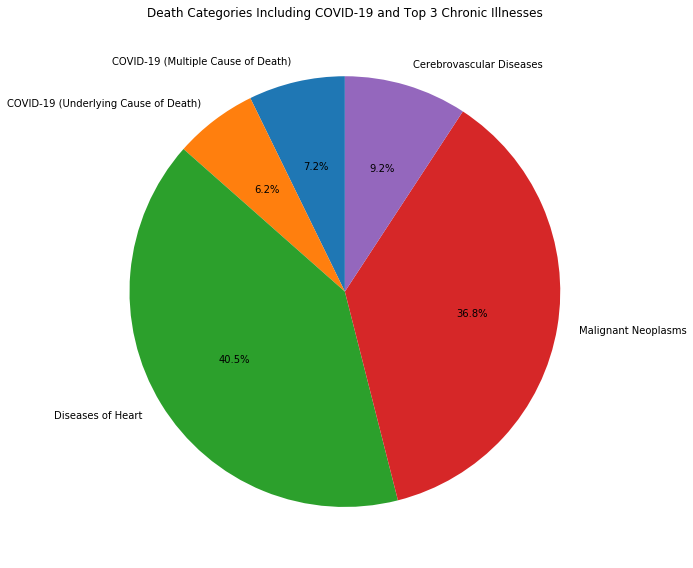

In [73]:
# Sum the data for the columns of interest
categories = [
    'COVID-19 (Multiple Cause of Death)', 
    'COVID-19 (Underlying Cause of Death)',
    'Diseases of Heart', 
    'Malignant Neoplasms', 
    'Cerebrovascular Diseases'
]
total_deaths = data[categories].sum()

# Create the pie chart
plt.figure(figsize=(10, 8))
total_deaths.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Death Categories Including COVID-19 and Top 3 Chronic Illnesses')
plt.ylabel('')  # This is to remove the default column name as ylabel
plt.tight_layout()
plt.show()
